In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Bikes

In [2]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


## Trying to understand the distribution of trip durations

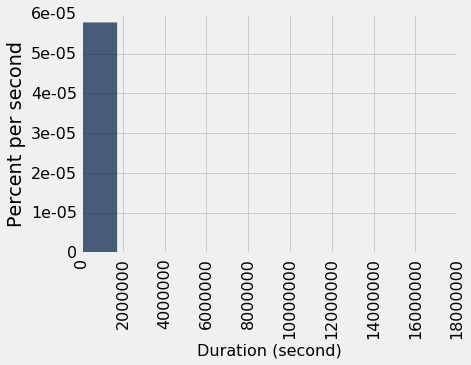

In [3]:
trips.hist("Duration", unit="second")

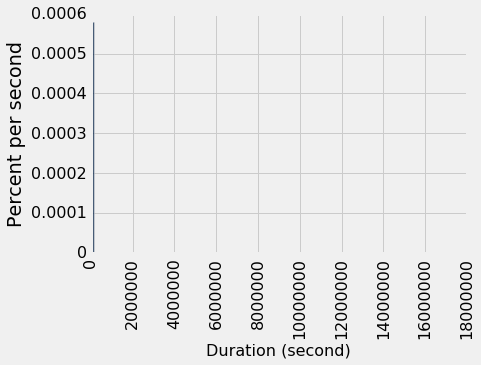

In [4]:
trips.hist("Duration", unit="second", bins=100)

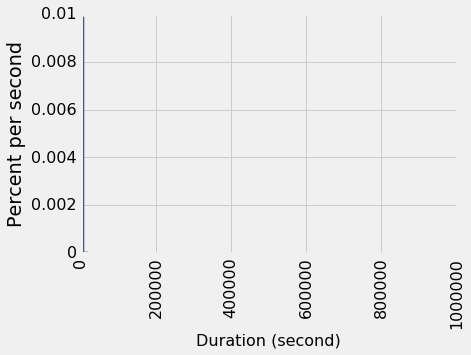

In [7]:
trips.hist("Duration", unit="second", bins=np.arange(0, 1000000, 10000)) # Awkward

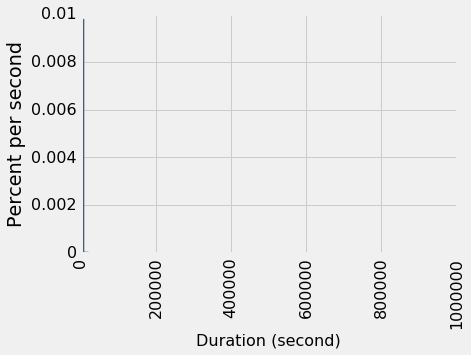

In [8]:
trips.hist("Duration", unit="second", bins=np.linspace(0, 1000000, 100)) # Somewhat less awkward

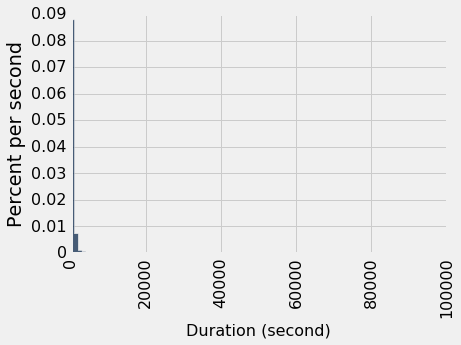

In [9]:
trips.hist("Duration", unit="second", bins=np.linspace(0, 100000, 100)) # Zooming in

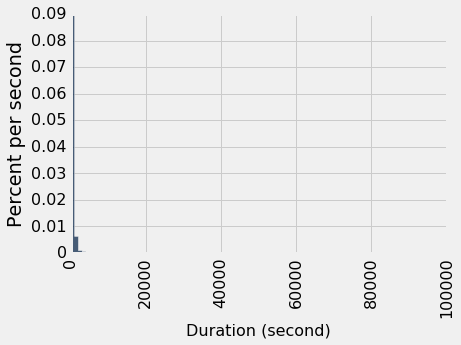

In [10]:
trips.where("Duration", are.below(100000)).hist("Duration", unit="second", bins=100) # Cleaner way to zoom in

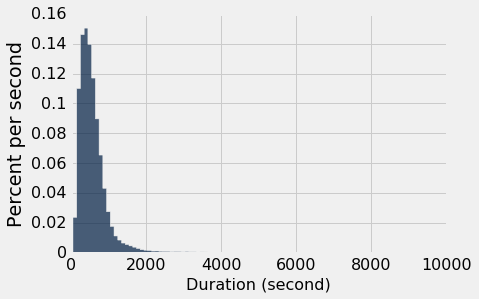

In [11]:
# Reasonable bins.  Does this mean there are no trips longer than
# 10,000 seconds?
trips.where("Duration", are.below(10000)).hist("Duration", unit="second", bins=100)

In [13]:
100 * trips.where("Duration", are.above(1000000)).num_rows / trips.num_rows

0.0011294585375770856

In [14]:
# Defining a function to make this a bit nicer...
def percent_of_trips(num_trips):
    """num_trips as a percentage of the total number of trips.
    
    Returns:
      str: A string containing num_trips (the given argument) as a percentage
        of the rows in the trips table."""
    return str(np.round(100 * num_trips / trips.num_rows, 3)) + "%"

percent_of_trips(trips.where("Duration", are.above(1000000)).num_rows)

'0.001%'

In [15]:
# Even nicer function:
def percent_of_trips_above(n):
    return percent_of_trips(trips.where("Duration", are.above(n)).num_rows)

percent_of_trips_above(10000)

'1.095%'

In [16]:
percent_of_trips_above(1000)

'11.61%'

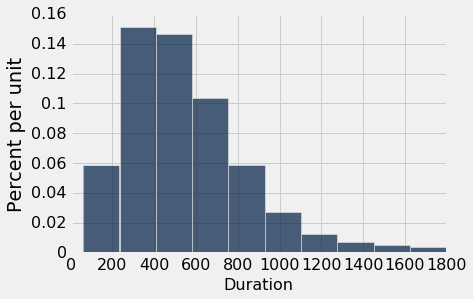

In [17]:
# Working with the free trips, generally commute-length:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration')

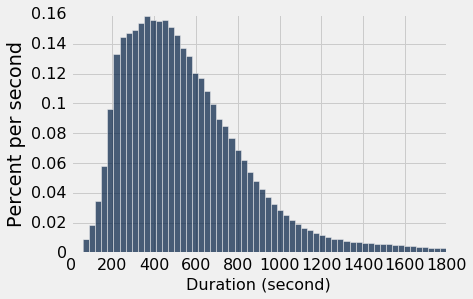

In [18]:
commute.hist('Duration', bins=60, unit='second')

In [ ]:
# About how many trips took between 250 and 550 seconds?
(550-250) * 0.15

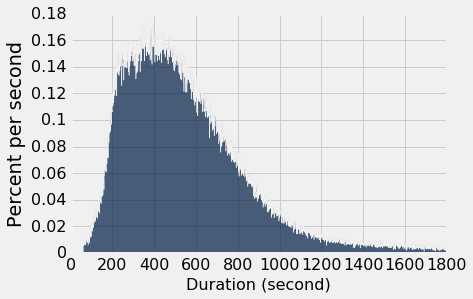

In [20]:
# Can also use finer bins, which doesn't change much.
# The distribution looks fairly nice even at this granularity
# because there are so many trips.
commute.hist('Duration', bins=np.arange(1801), unit='second')

## Where do trips start?

In [21]:
starts = trips.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),26304
San Francisco Caltrain 2 (330 Townsend),21758
Harry Bridges Plaza (Ferry Building),17255
Temporary Transbay Terminal (Howard at Beale),14436
Embarcadero at Sansome,14158
2nd at Townsend,14026
Townsend at 7th,13752
Steuart at Market,13687
Market at 10th,11885
Market at Sansome,11431


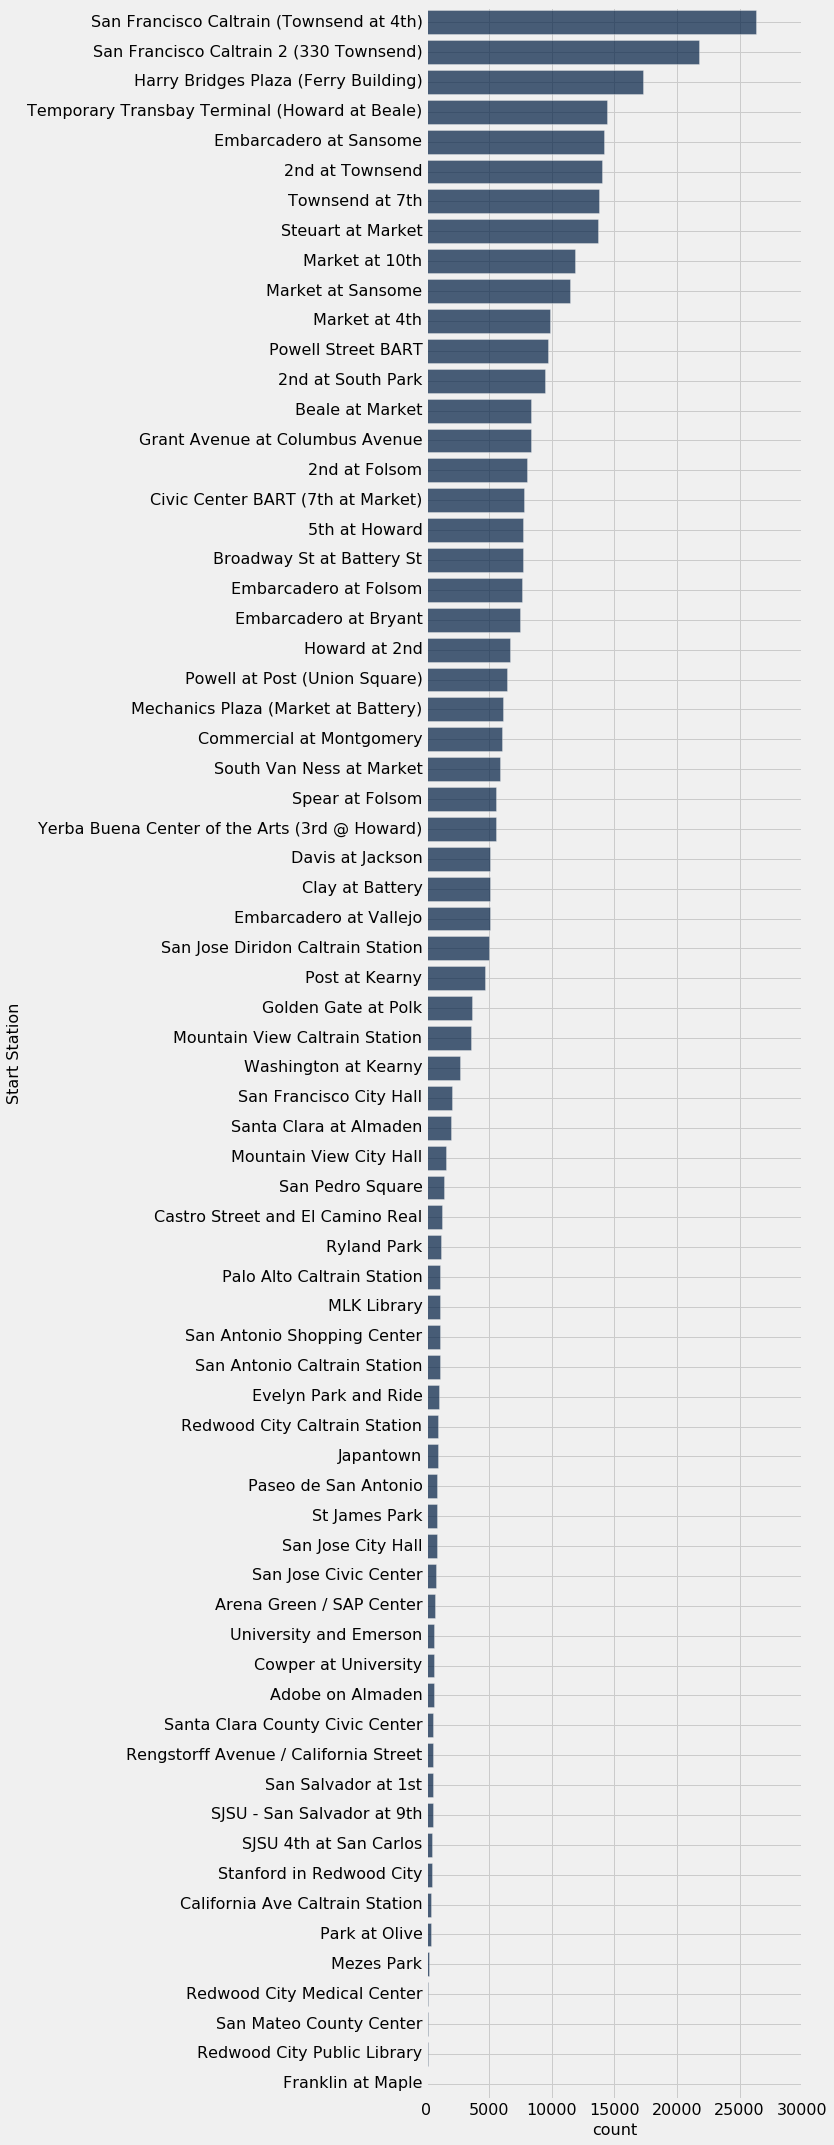

In [22]:
starts.barh("Start Station", "count")

In [27]:
duration_by_station = trips.select('Start Station', 'Duration')\
                           .group('Start Station', np.mean)\
                           .sort("Duration mean")\
                           .relabeled("Duration mean", "Average trip duration")
duration_by_station

Start Station,Average trip duration
2nd at Folsom,543.396
Temporary Transbay Terminal (Howard at Beale),612.622
Townsend at 7th,626.133
San Francisco Caltrain 2 (330 Townsend),660.838
2nd at South Park,691.807
Howard at 2nd,697.077
2nd at Townsend,719.057
Beale at Market,736.002
Broadway St at Battery St,787.533
Embarcadero at Folsom,788.385


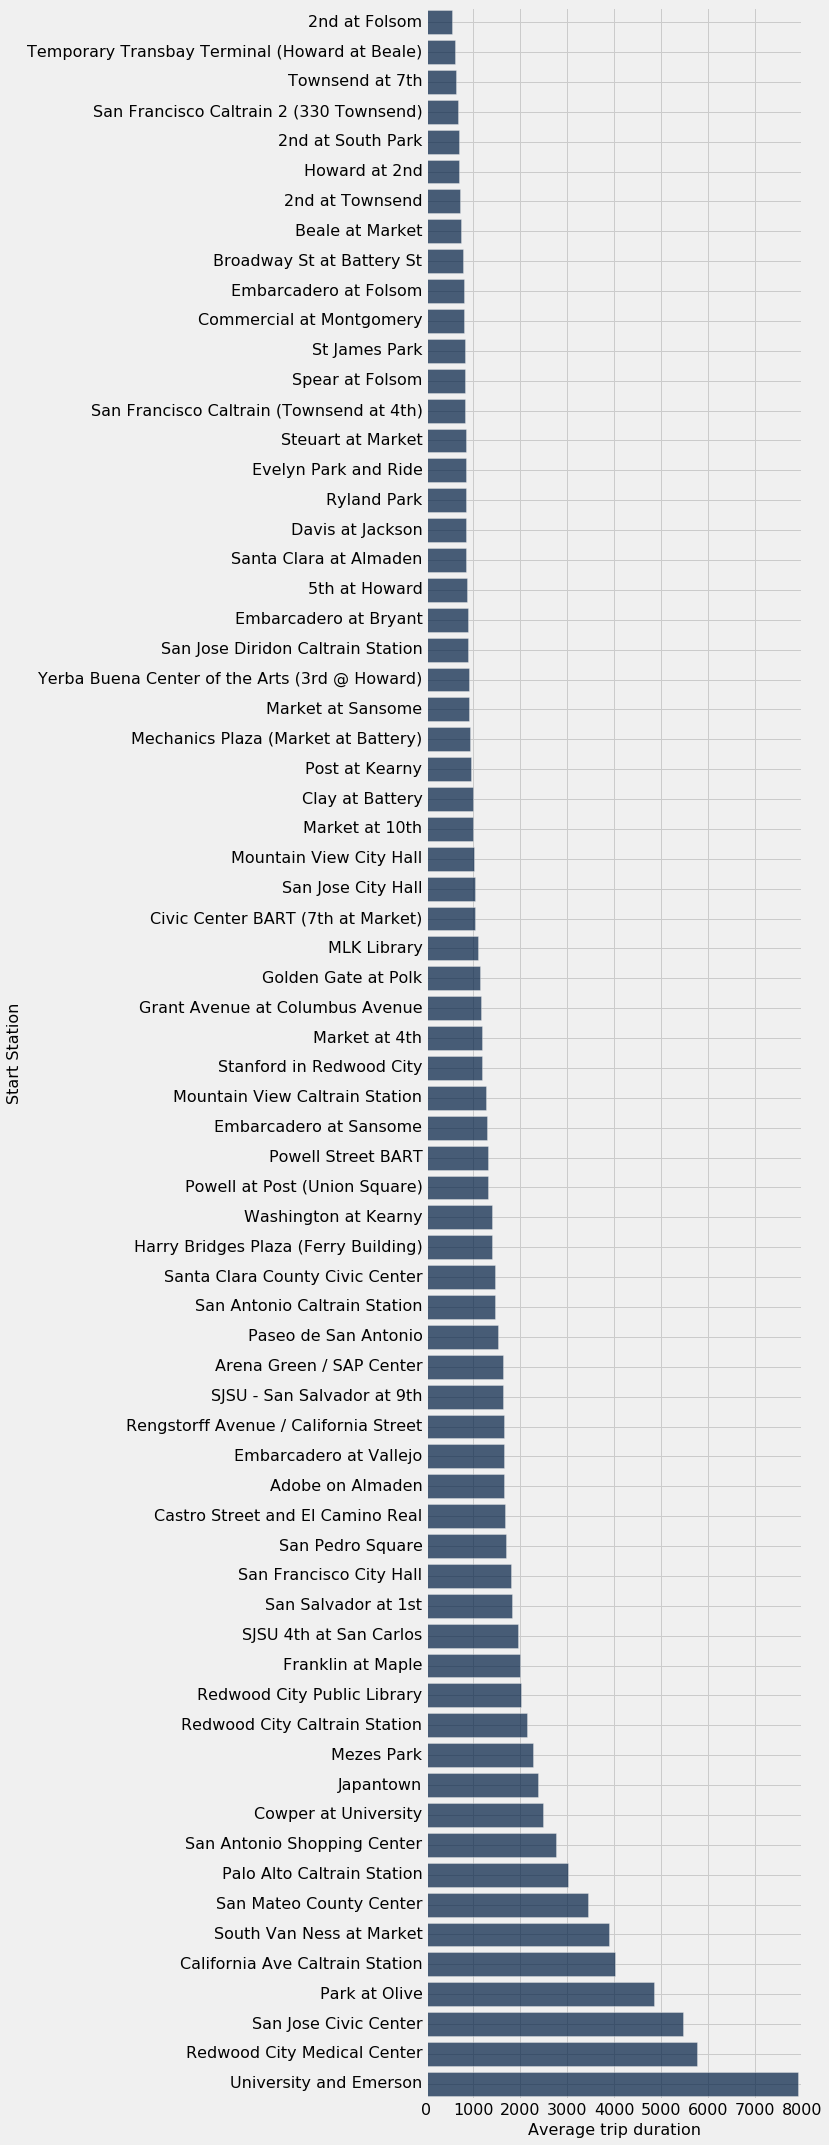

In [36]:
duration_by_station.barh(0, 1)

In [26]:
min_by_station = trips.select('Start Station', 'Duration')\
                           .group('Start Station', np.min)\
                           .sort("Duration amin")\
                           .relabeled("Duration amin", "Smallest trip duration")
min_by_station

Start Station,Smallest trip duration
2nd at South Park,60
2nd at Townsend,60
Beale at Market,60
Civic Center BART (7th at Market),60
Embarcadero at Folsom,60
Embarcadero at Sansome,60
Golden Gate at Polk,60
Harry Bridges Plaza (Ferry Building),60
Howard at 2nd,60
Market at Sansome,60


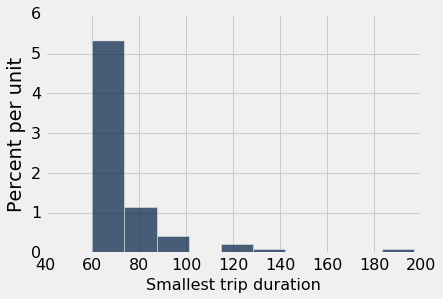

In [30]:
min_by_station.hist(1)

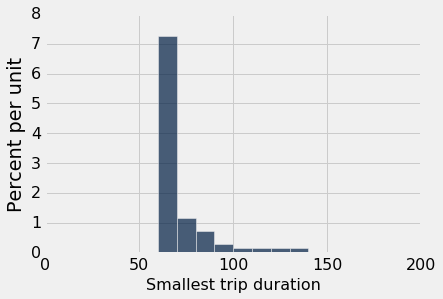

In [33]:
min_by_station.hist(1, bins=np.arange(0, 200, 10))

In [34]:
max_by_station = trips.select('Start Station', 'Duration')\
                           .group('Start Station', np.max)\
                           .sort("Duration amax")\
                           .relabeled("Duration amax", "Longest trip duration")
max_by_station

Start Station,Longest trip duration
Stanford in Redwood City,34952
Franklin at Maple,42960
Evelyn Park and Ride,51693
Redwood City Public Library,59368
2nd at Folsom,67251
Davis at Jackson,68367
Washington at Kearny,69141
Temporary Transbay Terminal (Howard at Beale),69770
Golden Gate at Polk,73103
2nd at South Park,75543


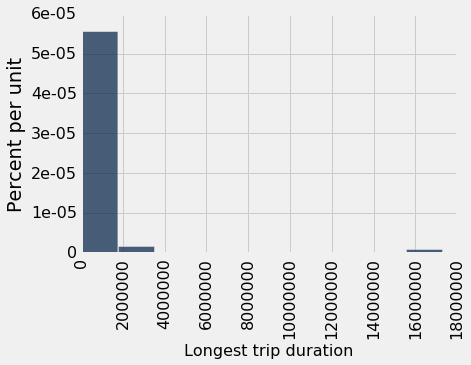

In [35]:
max_by_station.hist(1)

## Putting the data together

In [37]:
# Step one:
def find_trip_count(station_name):
    return starts.where("Start Station", are.equal_to(station_name)).column("count").item(0)

# Step two:
counts = duration_by_station.apply(find_trip_count, "Start Station")

# Step three:
durations_and_counts = duration_by_station.with_column("Number of trips", counts)
durations_and_counts

Start Station,Average trip duration,Number of trips
2nd at Folsom,543.396,7999
Temporary Transbay Terminal (Howard at Beale),612.622,14436
Townsend at 7th,626.133,13752
San Francisco Caltrain 2 (330 Townsend),660.838,21758
2nd at South Park,691.807,9469
Howard at 2nd,697.077,6660
2nd at Townsend,719.057,14026
Beale at Market,736.002,8359
Broadway St at Battery St,787.533,7676
Embarcadero at Folsom,788.385,7596


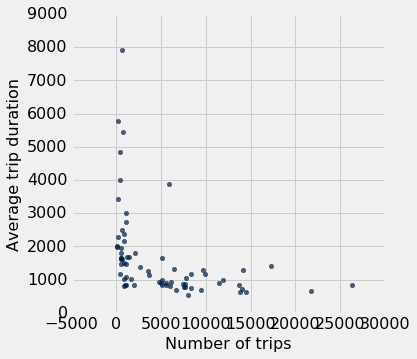

In [39]:
durations_and_counts.scatter(2, 1)

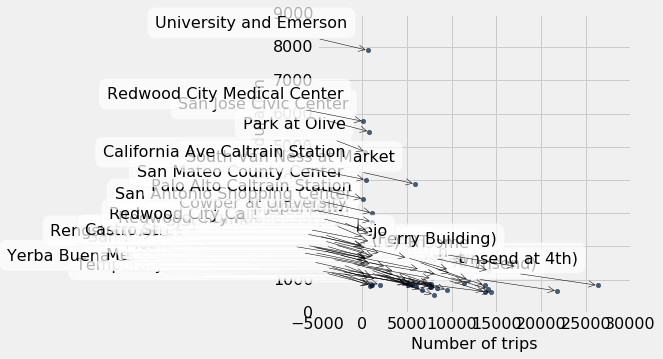

In [44]:
# Labels?
durations_and_counts.scatter("Number of trips", "Average trip duration", labels="Start Station")

## Maps

In [40]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [41]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [42]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=150)

In [47]:
colors = stations.group('landmark').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [49]:
def find_color(city_name):
    return colors.where("landmark", are.equal_to(city_name)).column("color").item(0)

with_colors = stations.with_column("color", stations.apply(find_color, "landmark"))
with_colors.show(3)

station_id,name,lat,long,dockcount,landmark,installation,color
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,purple
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,purple
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,purple


In [50]:
Marker.map_table(with_colors.select('lat', 'long', 'landmark', 'color'))

In [51]:
def find_trip_count(station_name):
    return starts.where("Start Station", are.equal_to(station_name)).column("count").item(0)

stations_with_trip_data = stations.where("name", are.contained_in(starts.column("Start Station")))
count_by_station = stations_with_trip_data.with_column(
    "Number of trips",
    stations_with_trip_data.apply(find_trip_count, "name"))
count_by_station

station_id,name,lat,long,dockcount,landmark,installation,Number of trips
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,4968
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,774
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,1958
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013,562
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013,1418
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013,856
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013,495
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013,885
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013,832
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013,1099


In [52]:
starts_map_data = count_by_station.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', count_by_station.column('Number of trips') * 1000
)
starts_map_data.show(3)
Circle.map_table(starts_map_data)

lat,long,name,color,area
37.3297,-121.902,San Jose Diridon Caltrain Station,blue,4968000
37.3307,-121.889,San Jose Civic Center,blue,774000
37.334,-121.895,Santa Clara at Almaden,blue,1958000


In [ ]:
Circle.map_table(station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
))

## Extras

In [53]:
durations = trips.group("Start Station", np.mean)

def find_average_duration(station_name):
    return durations.where("Start Station", are.equal_to(station_name)).column("Duration mean").item(0)

with_duration = count_by_station.with_column(
    "Average trip duration",
    count_by_station.apply(find_average_duration, "name"))
with_duration.show(3)

station_id,name,lat,long,dockcount,landmark,installation,Number of trips,Average trip duration
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013,4968,884.375
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013,774,5458.04
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013,1958,850.924


In [54]:
def duration_to_color(average_duration):
    """Converts an average trip duration to a string describing a color.
    
    Longer durations will be closer to bright red, and shorter durations
    will be closer to black.
    
    Args:
      average_duration (float): The average trip duration for one
        station.
    
    Returns:
      (string): A string describing a color based on the given average
        trip duration.  The string is in 6-digit hexidecimal format,
        which is a common way to describe colors."""
    max_duration_color = 255
    color_bits = 8
    rescaled_duration = min(max_duration_color, int(256 * average_duration / 5000))
    red_amount = 2**(2*color_bits) * rescaled_duration
    color = '#{:06X}'.format(red_amount)
    return color

duration_map_data = with_duration.select('lat', 'long', 'name').with_columns(
    'color', with_duration.apply(duration_to_color, 'Average trip duration'),
    'area', with_duration.column('Number of trips') * 4000,
)
duration_map_data.show(3)
Circle.map_table(duration_map_data, fill_opacity=1)

lat,long,name,color,area
37.3297,-121.902,San Jose Diridon Caltrain Station,#2D0000,19872000
37.3307,-121.889,San Jose Civic Center,#FF0000,3096000
37.334,-121.895,Santa Clara at Almaden,#2B0000,7832000


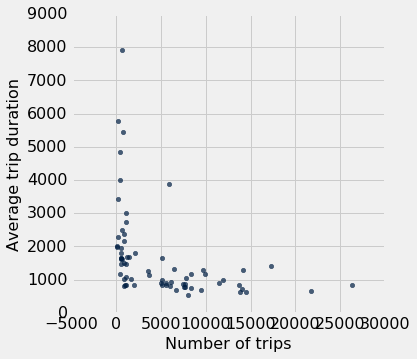

In [55]:
with_duration.scatter('Number of trips', 'Average trip duration')

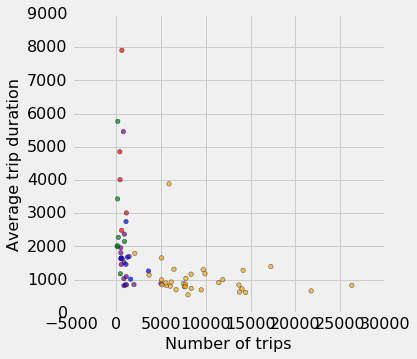

In [60]:
with_duration.scatter('Number of trips', 'Average trip duration', c=with_duration.apply(find_color, 'landmark'))

In [61]:
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple
